In [1]:
#import libraries
import pandas as pd
import json
import re
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import warnings
import pprint
warnings.simplefilter('ignore')

In [2]:
#read all files
for file in os.listdir("./all_nutrition"):
    print(file)

nutrition1.csv
nutrition2.csv
nutrition3.csv
nutrition4.csv
nutrition5.csv
nutrition6.csv
nutrition7.csv
nutrition8.csv
nutrition9.csv


In [3]:
#store all csv into a dataframe
df_list = []
for file in os.listdir("./all_nutrition"):
    if file.endswith(".csv"):
        nutrition_df = pd.read_csv(f"./all_nutrition/{file}")#, sep=";")#, parse_dates=True)
        df_list.append(nutrition_df)
nutrition_df = pd.concat(df_list, sort=True)

In [4]:
nutrition_df.head()

,Alcohol g,Caffeine mg,Calcium mg,Calories kcal,Carbohydrates g,Cholesterol mg,Copper mg,Fat g,Fiber g,Folate µg,...,Vitamin B2 mg,Vitamin B3 mg,Vitamin B5 mg,Vitamin B6 mg,Vitamin C mg,Vitamin D µg,Vitamin E mg,Vitamin K µg,Zinc mg,recipe_id
0,NaN,NaN,139.72,625.07,71.66,0.0,0.97,30.69,9.56,191.83,...,0.33,1.67,0.88,0.63,81.79,NaN,3.29,5.16,3.60,715769
1,NaN,NaN,224.86,221.45,49.50,0.0,1.07,0.82,25.12,310.98,...,0.31,4.82,1.56,0.57,54.16,NaN,0.99,76.29,2.32,648257
2,NaN,NaN,114.77,450.17,72.38,0.0,0.76,10.35,8.43,201.32,...,0.94,9.50,2.35,0.75,9.75,0.23,1.18,75.67,2.60,1095745
3,NaN,NaN,75.51,445.72,62.82,0.0,0.25,16.90,5.28,176.59,...,0.52,6.30,0.69,0.43,112.67,NaN,4.08,27.70,1.46,658753
4,NaN,NaN,74.17,232.48,16.15,0.0,0.12,18.01,6.48,103.78,...,0.15,1.27,0.53,0.38,144.82,NaN,4.02,311.62,0.73,658515


In [5]:
#nutrition_df.info()

In [6]:
nutrition_df.fillna(value=0,inplace=True)

In [7]:
#nutrition_df.info()

In [8]:
new_nutrition_df=nutrition_df[['recipe_id','Carbohydrates g','Calories kcal','Fat g','Protein g']]
new_nutrition_df.head()

,recipe_id,Carbohydrates g,Calories kcal,Fat g,Protein g
0,715769,71.66,625.07,30.69,19.86
1,648257,49.50,221.45,0.82,15.21
2,1095745,72.38,450.17,10.35,20.54
3,658753,62.82,445.72,16.90,12.75
4,658515,16.15,232.48,18.01,5.82


In [9]:
#Creating new dataframe with selected nutrition elements
new_nutrition_df.to_csv('./final/new_nutrition.csv',index=False)

# Removing Duplicate rows

In [10]:
print(nutrition_df.duplicated().sum())

62


In [11]:
nutrition_df.drop_duplicates(inplace=True)
nutrition_df.rename(columns={'recipe_id':'id'},inplace=True)
nutrition_df.head()

,Alcohol g,Caffeine mg,Calcium mg,Calories kcal,Carbohydrates g,Cholesterol mg,Copper mg,Fat g,Fiber g,Folate µg,...,Vitamin B2 mg,Vitamin B3 mg,Vitamin B5 mg,Vitamin B6 mg,Vitamin C mg,Vitamin D µg,Vitamin E mg,Vitamin K µg,Zinc mg,id
0,0.0,0.0,139.72,625.07,71.66,0.0,0.97,30.69,9.56,191.83,...,0.33,1.67,0.88,0.63,81.79,0.00,3.29,5.16,3.60,715769
1,0.0,0.0,224.86,221.45,49.50,0.0,1.07,0.82,25.12,310.98,...,0.31,4.82,1.56,0.57,54.16,0.00,0.99,76.29,2.32,648257
2,0.0,0.0,114.77,450.17,72.38,0.0,0.76,10.35,8.43,201.32,...,0.94,9.50,2.35,0.75,9.75,0.23,1.18,75.67,2.60,1095745
3,0.0,0.0,75.51,445.72,62.82,0.0,0.25,16.90,5.28,176.59,...,0.52,6.30,0.69,0.43,112.67,0.00,4.08,27.70,1.46,658753
4,0.0,0.0,74.17,232.48,16.15,0.0,0.12,18.01,6.48,103.78,...,0.15,1.27,0.53,0.38,144.82,0.00,4.02,311.62,0.73,658515


In [12]:
nutri_recipes=pd.read_csv('./final/all_recipes_new_df.csv')
nutri_recipes.head()

,Unnamed: 0,cuisines,dish,ingredients_lists,id,image,ingredients,instructions,readyInMinutes,servings,title,Carbohydrates g,Calories kcal,Fat g,Protein g
0,8,"['Mediterranean', 'Italian', 'European']",1,"['broccolini', 'garlic clove', 'olive oil', 'o...",715769,https://spoonacular.com/recipeImages/715769-31...,"{'broccolini': '0.5 bunch', 'garlic clove': '0...",In a large pan with lid heat olive oil over me...,30,2,Broccolini Quinoa Pilaf,71.66,625.07,30.69,19.86
1,12,Italian,1,"['artichoke', 'bay leaf', 'coriander seeds', '...",648257,https://spoonacular.com/recipeImages/648257-31...,"{'artichoke': '1.0 pound', 'bay leaf': '1.0 ',...",Snip the thorns off the artichoke leaves.Place...,35,1,Italian Steamed Artichokes,49.50,221.45,0.82,15.21
2,16,Italian,1,"['crusty bread', 'mushrooms', 'spinach', 'chic...",1095745,https://spoonacular.com/recipeImages/1095745-3...,"{'crusty bread': '0.25 loaf', 'mushrooms': '0....","To make the hummus, place all ingredients in a...",30,4,Mushroom Hummus Crostini,76.92,468.07,9.76,21.49
3,20,Italian,1,"['balsamic vinegar', 'extra virgin olive oil',...",658753,https://spoonacular.com/recipeImages/658753-31...,"{'balsamic vinegar': '0.5 tablespoons', 'extra...",Slice the bread on a bias about 1/2 inch thick...,45,4,Roma Tomato Bruschetta,67.36,466.44,16.31,13.70
4,24,Italian,1,"['balsamic vinegar', 'brussels sprouts', 'extr...",658515,https://spoonacular.com/recipeImages/658515-31...,"{'balsamic vinegar': '0.25 tablespoon', 'bruss...",Heat oven to 450 degrees. Trim bottom of Bruss...,45,4,Roasted Brussels Sprouts With Garlic,16.15,232.48,18.01,5.82


In [13]:
nutri_eda_df=nutri_recipes.merge(nutrition_df,on='id')
nutri_eda_df.head()

,Unnamed: 0,cuisines,dish,ingredients_lists,id,image,ingredients,instructions,readyInMinutes,servings,...,Vitamin B12 µg,Vitamin B2 mg,Vitamin B3 mg,Vitamin B5 mg,Vitamin B6 mg,Vitamin C mg,Vitamin D µg,Vitamin E mg,Vitamin K µg,Zinc mg
0,8,"['Mediterranean', 'Italian', 'European']",1,"['broccolini', 'garlic clove', 'olive oil', 'o...",715769,https://spoonacular.com/recipeImages/715769-31...,"{'broccolini': '0.5 bunch', 'garlic clove': '0...",In a large pan with lid heat olive oil over me...,30,2,...,0.0,0.33,1.67,0.88,0.63,81.79,0.00,3.29,5.16,3.60
1,12,Italian,1,"['artichoke', 'bay leaf', 'coriander seeds', '...",648257,https://spoonacular.com/recipeImages/648257-31...,"{'artichoke': '1.0 pound', 'bay leaf': '1.0 ',...",Snip the thorns off the artichoke leaves.Place...,35,1,...,0.0,0.31,4.82,1.56,0.57,54.16,0.00,0.99,76.29,2.32
2,16,Italian,1,"['crusty bread', 'mushrooms', 'spinach', 'chic...",1095745,https://spoonacular.com/recipeImages/1095745-3...,"{'crusty bread': '0.25 loaf', 'mushrooms': '0....","To make the hummus, place all ingredients in a...",30,4,...,0.0,0.94,9.50,2.35,0.75,9.75,0.23,1.18,75.67,2.60
3,20,Italian,1,"['balsamic vinegar', 'extra virgin olive oil',...",658753,https://spoonacular.com/recipeImages/658753-31...,"{'balsamic vinegar': '0.5 tablespoons', 'extra...",Slice the bread on a bias about 1/2 inch thick...,45,4,...,0.0,0.52,6.30,0.69,0.43,112.67,0.00,4.08,27.70,1.46
4,24,Italian,1,"['balsamic vinegar', 'brussels sprouts', 'extr...",658515,https://spoonacular.com/recipeImages/658515-31...,"{'balsamic vinegar': '0.25 tablespoon', 'bruss...",Heat oven to 450 degrees. Trim bottom of Bruss...,45,4,...,0.0,0.15,1.27,0.53,0.38,144.82,0.00,4.02,311.62,0.73


In [14]:
nutri_eda_df.to_csv("./final/nutri_eda_df.csv")

<AxesSubplot:ylabel='title'>

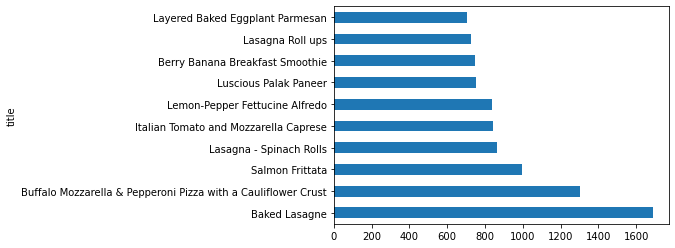

In [15]:
nutri_eda_df.groupby(['title'])["Calcium mg"].max().sort_values(ascending=False).head(10).plot.barh()

In [20]:
#nutri_eda_df.groupby(['title'])["Calories kcal"].min().sort_values(ascending=True).head(10).plot.barh()

<AxesSubplot:ylabel='title'>

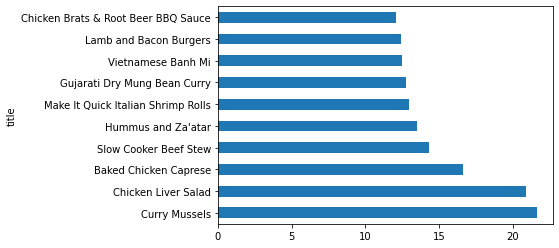

In [17]:
nutri_eda_df.groupby(['title'])["Iron mg"].max().sort_values(ascending=False).head(10).plot.barh()

<AxesSubplot:ylabel='title'>

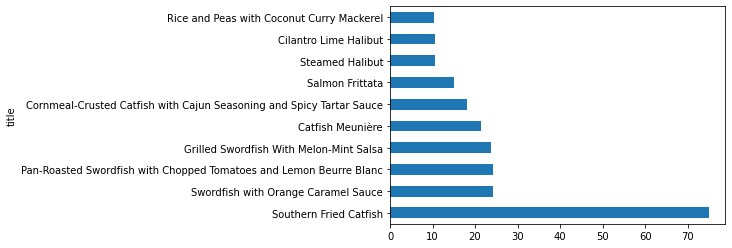

In [18]:
nutri_eda_df.groupby(['title'])["Vitamin D µg"].max().sort_values(ascending=False).head(10).plot.barh()

<AxesSubplot:ylabel='title'>

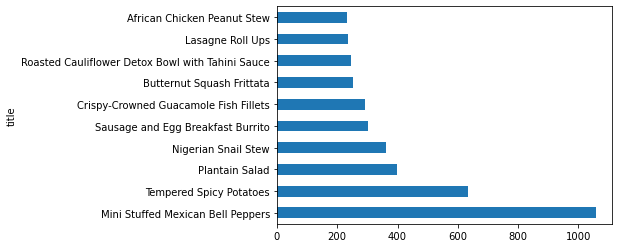

In [19]:
nutri_eda_df.groupby(['title'])["Vitamin C mg"].max().sort_values(ascending=False).head(10).plot.barh()